# Norms

## Vector norms

The contour lines of the major $p$-norms give some idea of the metric structure created by the norms. The 2-norm corresponds to Euclidean distance, so the level cuves in 2D are regular circles. 

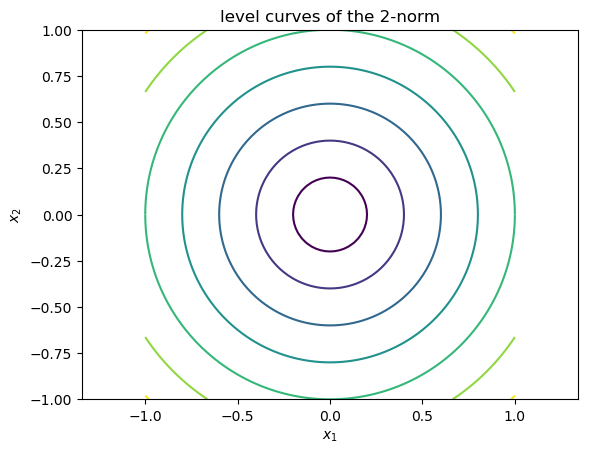

In [1]:
using LinearAlgebra, PyPlot
x = -1:0.025:1;
y = x';
contour(x,x,@. sqrt(x^2 + y^2));
axis("equal");
title("level curves of the 2-norm");
xlabel(L"x_1"); ylabel(L"x_2");

In the 1-norm, the "circles" are actually squares whose diagonals align with the coordinate axes.

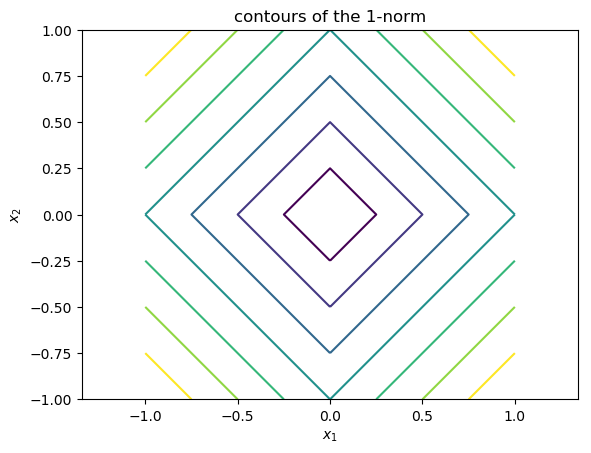

In [2]:
contour(x,x,@. abs(x) + abs(y));
axis("equal");
title("contours of the 1-norm");
xlabel(L"x_1"); ylabel(L"x_2");

And in the infinity norm, we get squares again, but with axes-aligned sides. 

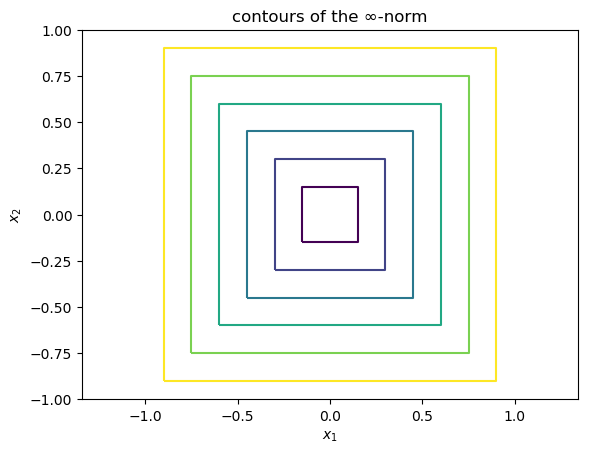

In [3]:
contour(x,x,@. max(abs(x),abs(y)));
axis("equal");
title("contours of the ∞-norm");
xlabel(L"x_1"); ylabel(L"x_2");

We won't use them, but the $p$-norms do vary smoothly at intermediate values of $p$.

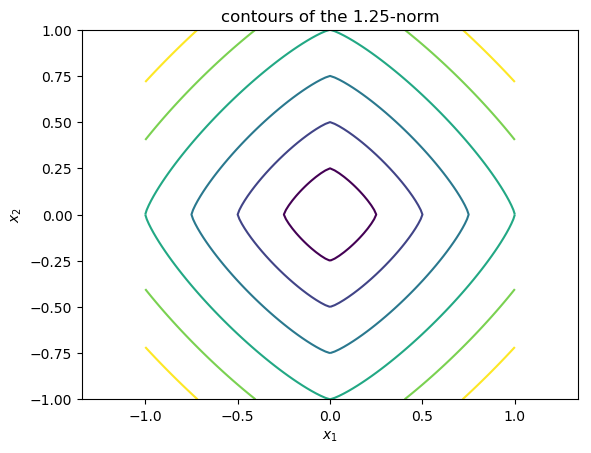

In [4]:
p = 1.25;
contour(x,x,@. (abs(x)^p + abs(y)^p)^(1/p));
axis("equal");
title("contours of the $p-norm");
xlabel(L"x_1"); ylabel(L"x_2");

## Induced matrix norms

A matrix norm is the maximum of $\|Ax\|$ over all unit vectors $x$. 

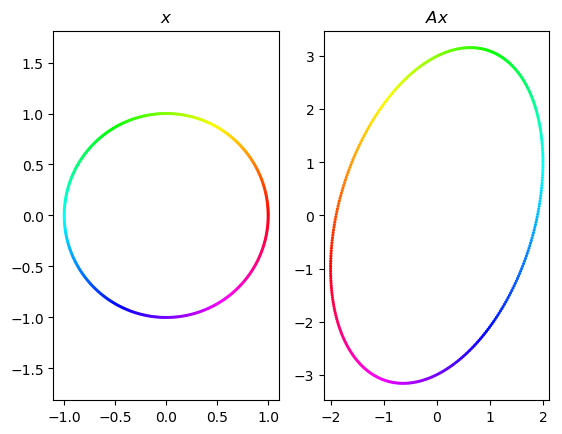

PyObject Text(0.5,1,'$Ax$')

In [5]:
A = [-2 0; -1 3];
t = 0:π/200:2π;
x1 = cos.(t);  
x2 = sin.(t);
Ax = A*[x1';x2'];
subplot(1,2,1)
scatter(x1,x2,20,t,".",cmap="hsv",edgecolor="none") 
axis("equal")
title(L"x")
subplot(1,2,2)
scatter(Ax[1,:],Ax[2,:],20,t,".",cmap="hsv",edgecolor="none")
axis("equal")
title(L"Ax")

Here's a visualization of the maximization that defines the matrix norm.

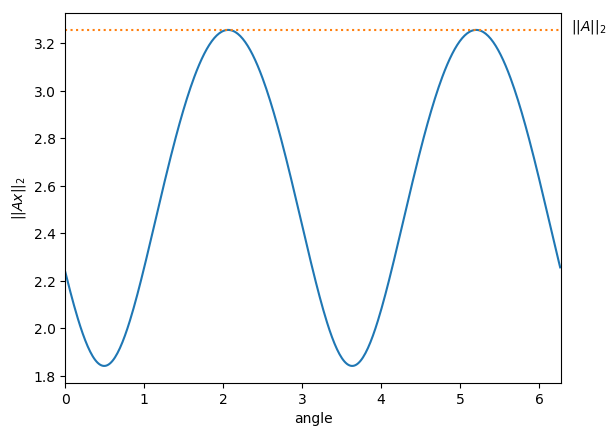

In [6]:
plot(t,[norm(Ax[:,j]) for j=1:size(Ax,2)]);
xlim(0,2*pi);
xlabel("angle");
ylabel(L"||Ax||_2");
plot([0; 2*pi],opnorm(A)*[1;1],":");
text(6.4,opnorm(A),L"||A||_2");

Repeating this process in the infinity norm is similar, just with a bit more effort to parameterize the "unit circle".

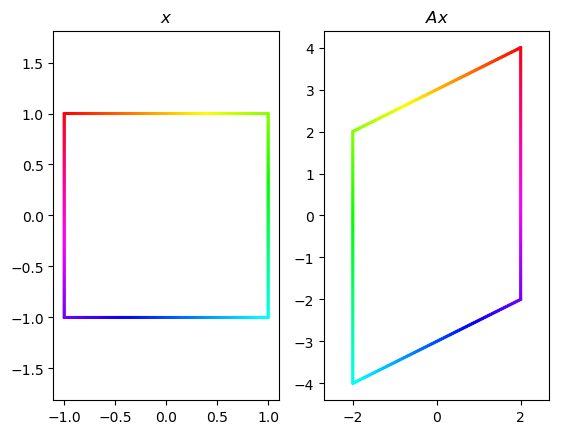

In [7]:
t = -1:0.01:1;  
o = ones(size(t));
x1 = [t;o;-t;-o];  
x2 = [o;-t;-o;t];
Ax = A*[x1';x2'];
subplot(1,2,1)
scatter(x1,x2,20,1:length(x1),".",cmap="hsv",edgecolor="none") 
axis("equal")
title(L"x")
subplot(1,2,2)
scatter(Ax[1,:],Ax[2,:],20,1:length(x1),".",cmap="hsv",edgecolor="none")
axis("equal")
title(L"Ax");

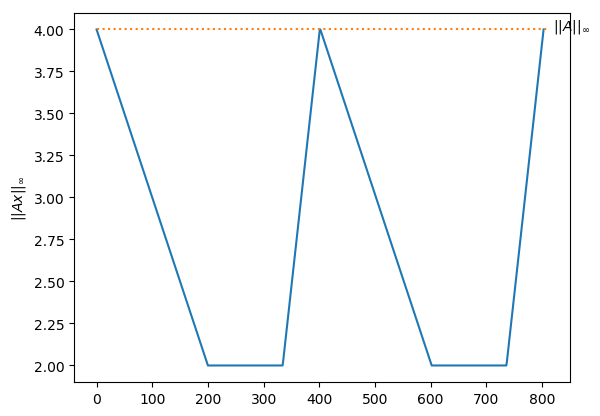

PyObject Text(820,4,'$||A||_{\\infty}$')

In [8]:
plot([norm(Ax[:,j],Inf) for j=1:size(Ax,2)]);
ylabel(L"||Ax||_{\infty}")
plot([1;810],opnorm(A,Inf)*[1;1],":")
text(820,opnorm(A,Inf),L"||A||_{\infty}")

## Unitary matrices

A unitary matrix has 2-norm equal to one, i.e., it preserves all Euclidean distances.

In [9]:
colrs = vec(sum(x,dims=1));
 


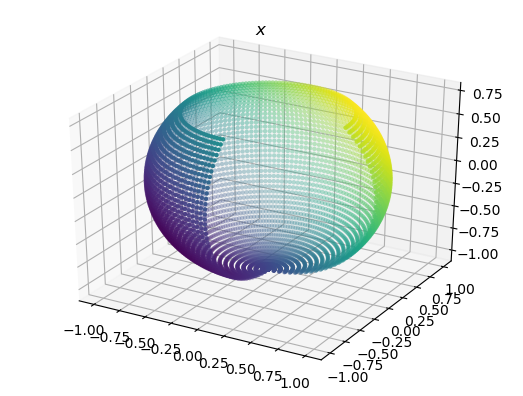

In [10]:
ϕ,θ = 0:π/80:1.5*π, π/4:π/60:π;
X1,X2,X3 = @. sin(θ)*cos(ϕ'), sin(θ)*sin(ϕ'), cos(θ)*(ϕ')^0;
x = [vec(X1)'; vec(X2)'; vec(X3)'];
Q = qr(rand(3,3)).Q;
Qx = Q*x;

colrs = vec(sum(x,dims=1));
scatter3D(x[1,:],x[2,:],zs=x[3,:],s=40,c=colrs,marker=".",edgecolor="none")
title(L"x");

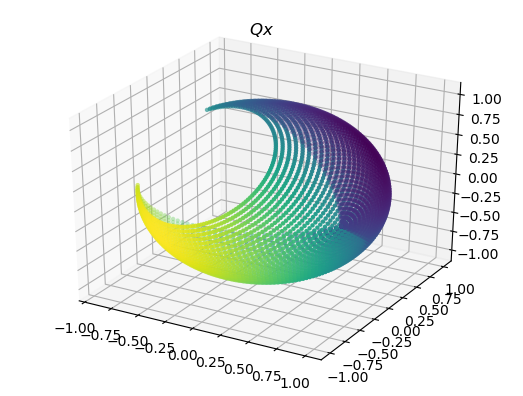

In [11]:
scatter3D(Qx[1,:],Qx[2,:],zs=Qx[3,:],s=40,c=colrs,marker=".",edgecolor="none")
title(L"Qx");


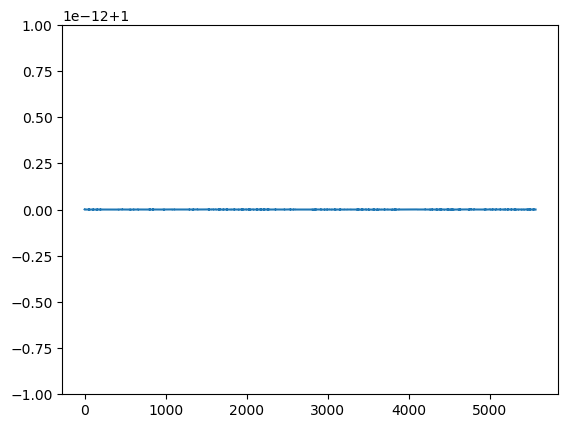

In [12]:
plot(vec(sum(Qx.^2,dims=1)));